In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data
df=pd.read_csv('corona_tweets_1_476.csv')


C:\Users\Kuro\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6,8,9,13,14,21,23,24,25,26,30,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
df=df.drop(['coordinates', 'id', 'user_default_profile_image', 'favorite_count','hashtags', 'user_created_at', 'tweet_url', 'user_screen_name','media','urls','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_user_id','lang','place','possibly_sensitive','retweet_id','retweet_screen_name','source','user_description','user_favourites_count','user_followers_count','user_friends_count',	'user_listed_count',	'user_location',	'user_name',	'user_screen_name.1',	'user_statuses_count','user_time_zone','user_urls','user_verified'],axis=1)
# dropping ALL duplicate texts

df.drop_duplicates(subset ="text",
                     keep = False, inplace = True)
df.describe()
df['created_at'] = pd.to_datetime(df['created_at'])
df.sort_values(by='created_at')
df.head(5)

,created_at,retweet_count,text
0,2020-03-19 20:07:11+00:00,241,RT @catturd2: LEGEND: Close Up Photo of Trump'...
1,2020-03-19 19:54:20+00:00,0,Very informative write-up on CODID 19 -https:/...
3,2020-03-19 20:31:57+00:00,0,This corona shit is fake &amp; shouldn’t be hy...
4,2020-03-19 20:25:38+00:00,977,RT @StefSimanowitz: If you would like to show ...
5,2020-03-19 20:42:35+00:00,1,RT @Siir_Stephen: Dance group AOG cames throug...


In [104]:

import re
import string
from nltk.corpus import stopwords

def text_preproc(x):
    #Lowercasing all the text
    x = x.lower()
    #Cleaning Text Hashtags
    x = re.sub("#\S+", " ", x)
    #Removing Unicode Data
    x = x.encode('ascii', 'ignore').decode()
    #Remove Mentions
    x = re.sub("@\S+", " ", x)
    #Remove URL
    x = re.sub("https*\S+", " ", x)
    #Remove Ticks and the next character.
    x = re.sub("\'\w+", '',x)
    #Remove Punctuations
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    # Replace more than one spaces consequently
    x = re.sub('\s{2,}', " ", x)
    # Remove Retweet text 'RT '
    x = re.sub('rt ', '', x)
    # Remove stop words
    stop_words = stopwords.words("english")
    x  = ' '.join([word for word in x.split(' ') if word not in stop_words])
    
    return x

df['clean_text'] = df.text.apply(text_preproc)
df['clean_text'].head(5)

0    legend close photo trump notes shows crossed c...
1                          informative write codid 19 
3    corona shit fake amp shouldnt hyped government...
4    would like show appreciation incredible nhs st...
5    dance group aog cames stunning video sensitizi...
Name: clean_text, dtype: object

In [125]:
from textblob import TextBlob

#Crerate a function to get the subjectivity (0.0 is very Objective and 1.0 is very subjective)
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity [-1.0 to 1.0]
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['clean_text'].apply(getsubjectivity)
df['Polarity'] = df['clean_text'].apply(getPolarity)

#Add a +1 padding to Polarity which would be useful later for calculating average
df['Polarity'] = df['Polarity'].add(1)
df.head(5)

,created_at,retweet_count,text,clean_text,Subjectivity,Polarity
0,2020-03-19 20:07:11+00:00,241,RT @catturd2: LEGEND: Close Up Photo of Trump'...,legend close photo trump notes shows crossed c...,0.000000,1.000
1,2020-03-19 19:54:20+00:00,0,Very informative write-up on CODID 19 -https:/...,informative write codid 19,0.000000,1.000
3,2020-03-19 20:31:57+00:00,0,This corona shit is fake &amp; shouldn’t be hy...,corona shit fake amp shouldnt hyped government...,0.700000,0.695
4,2020-03-19 20:25:38+00:00,977,RT @StefSimanowitz: If you would like to show ...,would like show appreciation incredible nhs st...,0.628571,1.450
5,2020-03-19 20:42:35+00:00,1,RT @Siir_Stephen: Dance group AOG cames throug...,dance group aog cames stunning video sensitizi...,0.416667,1.250


(array([  2687.,   2433.,  12477.,  16150.,  41523., 216304.,  44690.,
         17955.,   7339.,   5430.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

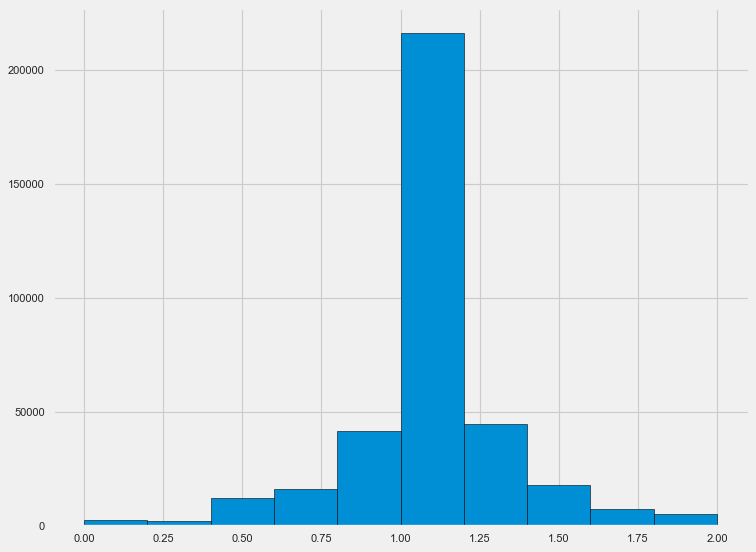

In [127]:
plt.style.use('fivethirtyeight')
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.hist(df['Polarity'], edgecolor= 'black')

(array([130161.,  16651.,  30962.,  27881.,  39098.,  51035.,  24270.,
         12927.,  10282.,  23721.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

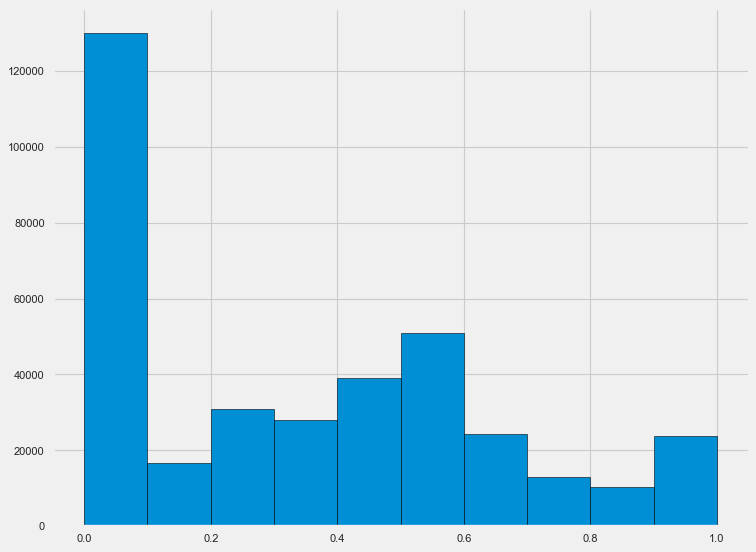

In [128]:
figure(figsize=(10, 8), dpi=80)
plt.hist(df['Subjectivity'], edgecolor= 'black')

No handles with labels found to put in legend.


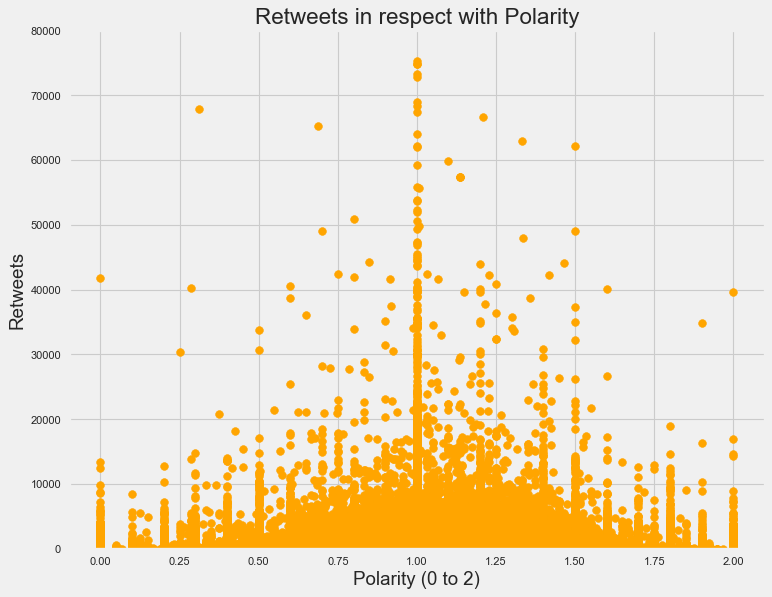

In [130]:
# Plot scatter of x and y coordinates.
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['Polarity'], df['retweet_count'], color='Orange')

# Add a legend, axis labels, and title.
plt.legend()
plt.ylim([0,80000])
plt.xlabel("Polarity (0 to 2)")
plt.ylabel("Retweets")
plt.title('Retweets in respect with Polarity')

plt.show()


No handles with labels found to put in legend.


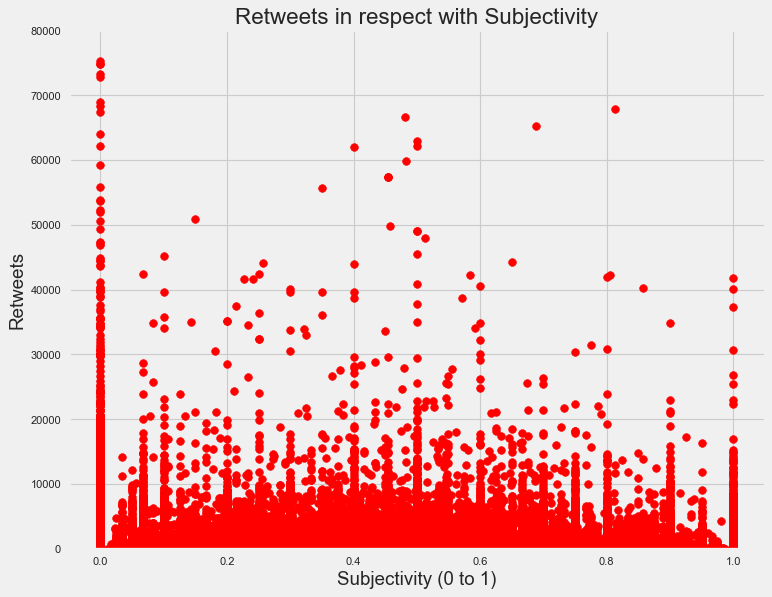

In [131]:
# Plot scatter of x and y coordinates.
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['Subjectivity'], df['retweet_count'], color='Red')

# Add a legend, axis labels, and title.
plt.legend()
plt.xlabel("Subjectivity (0 to 1)")
plt.ylabel("Retweets")
plt.ylim([0,80000])
plt.title('Retweets in respect with Subjectivity')

plt.show()


In [132]:
import datetime
counter_date = datetime.date(2020,3,19)
polarity_counter = 0.0
subjectivity_counter = 0.0
tweets_counter = 0
daywisedf = pd.DataFrame(columns=['date', 'Polarity', 'Subjectivity'])

for index, row in df.iterrows():
    delta = row['created_at'].date() - counter_date  
    if(delta.days> 0):
        daywisedf = daywisedf.append({'date': counter_date, 
                          'Polarity': polarity_counter/tweets_counter , 
                          'Subjectivity': subjectivity_counter/tweets_counter }, 
                         ignore_index=True)
        counter_date = row['created_at'].date()
        polarity_counter = row['Polarity']
        subjectivity_counter = row['Subjectivity']
        tweets_counter = 1
    
    polarity_counter += row['Polarity']
    subjectivity_counter+= row['Subjectivity']
    if(row['Polarity'] != 0):
        tweets_counter+=1
    
daywisedf.head(5)

,date,Polarity,Subjectivity
0,2020-03-19,1.023525,0.403386
1,2020-03-20,1.053827,0.340066
2,2020-03-21,1.057353,0.312471
3,2020-03-22,1.056050,0.317656
4,2020-03-23,1.037876,0.345382


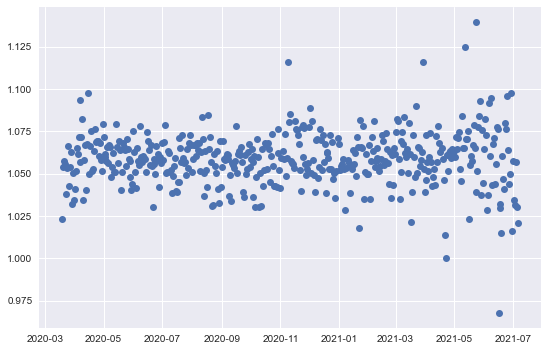

In [133]:
plt.style.use('seaborn')
plt.plot_date(daywisedf['date'], daywisedf['Polarity'])


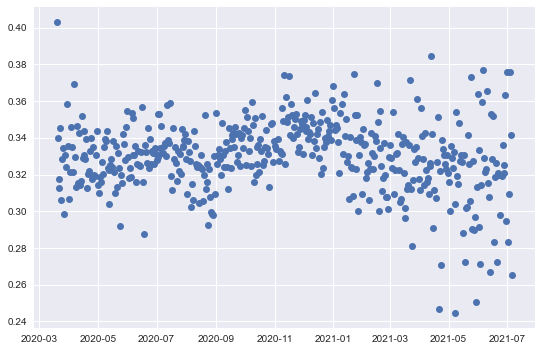

In [134]:
plt.style.use('seaborn')
plt.plot_date(daywisedf['date'], daywisedf['Subjectivity'])


In [135]:
compression_opts = dict(method='zip',
                        archive_name='daywiseSentiment.csv')  
daywisedf.to_csv('daywiseSentiment.zip', index=False,
          compression=compression_opts)  

In [141]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
print('Top 10 Tweets based off of High Polarity:')
printing_df = df.sort_values('Polarity',ascending = False).head(10) 
print(printing_df[['text', 'Polarity']])

Top 10 Tweets based off of High Polarity:
                                                                                                                                                                                                                                                                                     text  \
325995                                                                                                                                       RT @Williams_T_C: learning from our mistakes, and taking lessons from those who have handled this pandemic best \na Trainspotting inspired🧵…   
139323  😉 Do you best way to lose belly fat\n🎇 #bangaloreriots #TurkeyIsNotAlone\n#wednesdaymorning #YesSirGoAhead #السناب #وفاة_المشجعة_الهلالية #Bangalore #บอกรักแม่สไตล์น้องมิว #nastywoman #onlineclasses #COVID19 #coronavirus\n 🎇If you are than read here https://t.co/M2gUP8qTDw   
467239                                                                                                 

In [142]:
print('Top 10 Tweets based off of Low Polarity:')
printing_df = df.sort_values('Polarity',ascending = True).head(10) 
print(printing_df[['text', 'Polarity']])

Top 10 Tweets based off of Low Polarity:
                                                                                                                                                      text  \
402194                                 RT @holland_tom: Increasingly feeling that coming out of lockdown was a terrible mistake... https://t.co/6YDcJImONL   
276552                                                   Just when I thought #MoscowMitch couldn’t be more evil and despicable.... https://t.co/y43smfQPkl   
38947         RT @DavidJFHalliday: The BBC in Scotland seems terribly worried there'd be confusion in Scotland if our Covid-19 guidelines differed from B…   
213489        RT @RyanGirdusky: The most shocking thing for liberals should be that despite their insane level of bitching about Russia, impeachment, and…   
332369        RT @RealMickFoley: In the wake of this terrible pandemic, loneliness and isolation have been revealed as an epidemic all their own.\nIf you…   
38955      